# # Analiza wyników uzyskanych dla zaszumionych funkcji

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import ast

In [12]:
##ścieżka do wyników
_base = 'noises/noises_results_'
## badane poziomy szumów
_files = ['0.1', '0.01', '0.5', '0.05', '1.0', '5.0']
## badane metryki
_error = ['mse_train', 'mse_test', 'mae_train', 'mae_test']
_error2 = ['r2_train', 'r2_test']
li = []

for filename in _files:
    df = pd.read_csv(_base+filename+'.csv', index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [13]:
## pobranie danych
frame["params"] = frame["params"].apply(lambda x : dict(eval(x)) )
df = frame["params"].apply(pd.Series )
result = pd.concat([df, frame], axis=1).drop('params', axis=1)
result

,kernel,C,epsilon,gamma,degree,coef0,Unnamed: 0,noise,r2_train,r2_test,mse_train,mse_test,mae_test,mae_train
0,linear,64.768550,0.006793,NaN,NaN,NaN,0,0.1,7.603086e-01,7.321177e-01,2.396914e-01,2.480529e-01,0.413347,0.409111
1,linear,21.622820,0.013430,NaN,NaN,NaN,1,0.1,7.600917e-01,7.317793e-01,2.399083e-01,2.487656e-01,0.414311,0.409266
2,linear,6.092080,0.002850,NaN,NaN,NaN,2,0.1,7.603315e-01,7.330779e-01,2.396685e-01,2.470985e-01,0.412224,0.409257
3,rbf,7.897390,0.020708,30.10516,NaN,NaN,3,0.1,9.989017e-01,9.984427e-01,1.098322e-03,1.441849e-03,0.021924,0.018901
4,rbf,7.714452,0.010360,24.57617,NaN,NaN,4,0.1,9.985684e-01,9.981202e-01,1.431626e-03,1.739599e-03,0.021713,0.018870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,poly,52.474820,0.002830,NaN,7.0,9.45739,7,5.0,-2.698050e+04,-2.551474e+04,2.698150e+04,2.400267e+04,100.820200,106.768188
68,poly,0.346170,0.411307,NaN,4.0,2.22530,8,5.0,4.166313e-01,3.822058e-01,5.833687e-01,5.682685e-01,0.592944,0.611069
69,sigmoid,70.963740,1.412200,NaN,NaN,0.73840,9,5.0,-2.266631e+09,-2.523003e+09,2.266631e+09,2.229824e+09,38581.978214,39065.066855
70,sigmoid,89.265350,0.053990,NaN,NaN,7.50992,10,5.0,6.500650e-02,-2.751203e-02,9.349935e-01,1.009460e+00,0.783615,0.760408


In [14]:
## wyniki innego modelu regresji niż SVM- pobranie wyników
_linear = pd.read_csv(_base+'linear'+'.csv', index_col=None, header=0)
_linear

,Unnamed: 0,noise,r2_train,r2_test,mse_train,mse_test,mae_test,mae_train
0,0,0.01,0.760466,0.732743,0.239534,0.247723,0.413271,0.409040
1,1,0.05,0.760436,0.732764,0.239564,0.247777,0.413267,0.409029
2,2,0.10,0.760419,0.732195,0.239581,0.248265,0.414008,0.409038
3,3,0.50,0.753654,0.729578,0.246346,0.251590,0.418673,0.414388
4,4,1.00,0.732336,0.699891,0.267664,0.280737,0.442032,0.428989
5,5,5.00,0.381615,0.375773,0.618385,0.634279,0.645259,0.628737


In [15]:
linear_svm = result[result.kernel == 'linear']
rbf_svm = result[result.kernel == 'rbf']
sigmoid_svm = result[result.kernel == 'sigmoid']
poly_svm = result[result.kernel == 'poly']

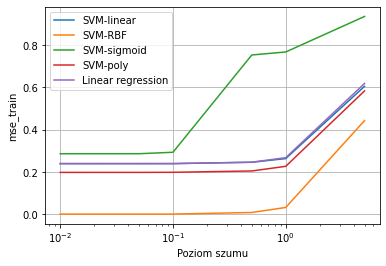

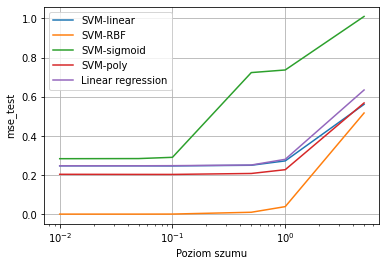

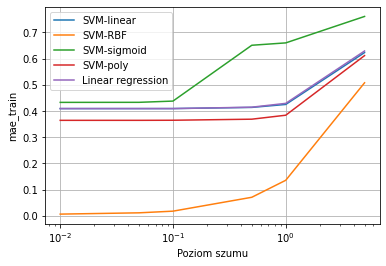

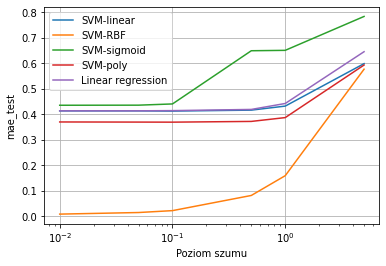

In [16]:
##generacja wykresów do sprawozdania
for err in _error:
    _res_lin = linear_svm.groupby(['noise'], as_index=False)[err].min()
    _res_rbf = rbf_svm.groupby(['noise'], as_index=False)[err].min()
    _res_sig = sigmoid_svm.groupby(['noise'], as_index=False)[err].min()
    _res_poly = poly_svm.groupby(['noise'], as_index=False)[err].min()
    _res_linreg = _linear.groupby(['noise'], as_index=False)[err].min()
    fig = plt.figure()

    for frame in [_res_lin, _res_rbf, _res_sig, _res_poly, _res_linreg]:
        plt.plot(frame['noise'], frame[err])
    plt.xscale('log')
    plt.legend(['SVM-linear', 'SVM-RBF', 'SVM-sigmoid', 'SVM-poly', 'Linear regression'])
    plt.ylabel(err)
    plt.xlabel("Poziom szumu")
    plt.grid()
    plt.savefig(err+'.png')
    plt.show()
    

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.show()

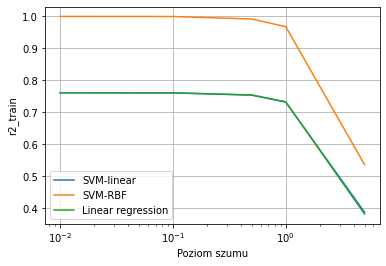

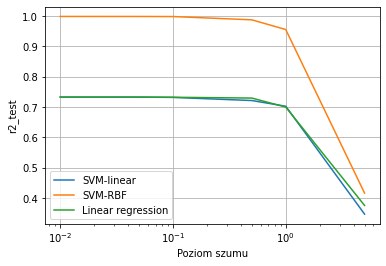

In [18]:
## generacja reszty wyników- dla poly i sigmoid były zbyt złe wyniki aby je pokazywać :)
for err in _error2:
    _res_lin = linear_svm.groupby(['noise'], as_index=False)[err].min()
    _res_rbf = rbf_svm.groupby(['noise'], as_index=False)[err].min()
#     _res_sig = sigmoid_svm.groupby(['noise'], as_index=False)[err].min()
#     _res_poly = poly_svm.groupby(['noise'], as_index=False)[err].min()
    _res_linreg = _linear.groupby(['noise'], as_index=False)[err].min()
    fig = plt.figure()

    for frame in [_res_lin, _res_rbf, _res_linreg]:
        plt.plot(frame['noise'], frame[err])
    plt.xscale('log')
    plt.legend(['SVM-linear', 'SVM-RBF', 'Linear regression'])
    plt.ylabel(err)
    plt.xlabel("Poziom szumu")
    plt.grid()
    plt.savefig(err+'.png')
    plt.show()
    

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.show()